---
# 10.7 Interpolating also derivative values
---

## Hermite cubic interpolation

Suppose we want to find a polynomial $p(x)$ that satisfies

$$
\begin{align}
p(x_0) &= f(x_0), \quad p'(x_0) = f'(x_0),\\
p(x_1) &= f(x_1), \quad p'(x_1) = f'(x_1).\\
\end{align}
$$

We can use these four equations to solve for the four coefficients of a cubic polynomial

$$p(x) = c_0 + c_1x + c_2x^2 + c_3x^3.$$

Note that 

$$p'(x) = c_1 + 2c_2x + 3c_3x^2.$$

Using the monomial basis $\left\{1, x, x^2, x^3\right\}$ we have the linear system:

$$
\begin{bmatrix}
1 & x_0 & x_0^2 &   x_0^3 \\
1 & x_1 & x_1^2 &   x_1^3 \\
0 &   1 & 2 x_0 & 3 x_0^2 \\
0 &   1 & 2 x_1 & 3 x_1^2 \\
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\c_2\\c_3\\
\end{bmatrix}
=
\begin{bmatrix}
f(x_0)\\f(x_1)\\f'(x_0)\\f'(x_1)\\
\end{bmatrix}.
$$


---

## Example

Suppose that 

$$
\begin{align}
f(0) &= 0, \quad f'(0) =  1,\\
f(1) &= 1, \quad f'(1) = -1.\\
\end{align}
$$

Then we need to solve

$$
\begin{bmatrix}
1 & 0 & 0 &   0 \\
1 & 1 & 1 &   1 \\
0 &   1 & 0 & 0 \\
0 &   1 & 2 & 3 \\
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\c_2\\c_3\\
\end{bmatrix}
=
\begin{bmatrix}
0\\1\\1\\-1\\
\end{bmatrix}.
$$

In [1]:
A = [
    1 0 0 0 
    1 1 1 1
    0 1 0 0
    0 1 2 3
]

b = [0, 1, 1, -1]

c = A\b

4-element Vector{Float64}:
  0.0
  1.0
  2.0
 -2.0

Therefore, the polynomial is

$$p(x) = x + 2x^2 - 2x^3.$$

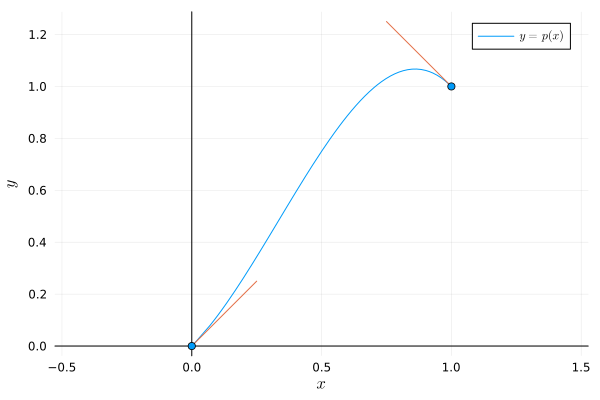

In [5]:
using Plots, LaTeXStrings

function cubic_hermite(x0, x1, f0, f1, fp0, fp1)
     A = [
        1 x0  x0^2  x0^3;
        1 x1  x1^2  x1^3;
        0  1 2x0   3x0^2;
        0  1 2x1   3x1^2;
    ]
    b = [f0, f1, fp0, fp1]
    c = A\b
    
    return x -> ((c[4]*x .+ c[3])*x .+ c[2])*x .+ c[1]
end

 x0,  x1 =  0.,  1.
 f0,  f1 =  0.,  1.
fp0, fp1 =  1., -1.

p = cubic_hermite(x0, x1, f0, f1, fp0, fp1)

plot(axes_style=:zerolines, aspect_ratio=:equal, xlabel=L"x", ylabel=L"y")
plot!(p, 0, 1, label=L"y=p(x)")
plot!(x -> fp0*(x-x0) + f0, x0, x0+0.25, label=:none, c=2)
plot!(x -> fp1*(x-x1) + f1, x1-0.25, x1, label=:none, c=2)
scatter!([x0, x1], [f0, f1], c=1, label=:none)

---

## Using divided differences

Another approach is to use Newton's form and divided differences.

We will use the convention that 

$$f[x_i,x_i] = f'(x_i).$$

Thus, we just need to complete the following table.

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
x_0 & f(x_0) & & \\
x_0 & f(x_0) & f'(x_0) & \\
x_1 & f(x_1) & f[x_0,x_1] & f[x_0,x_0,x_1] \\
x_1 & f(x_1) & f'(x_1) & f[x_0,x_1,x_1] & f[x_0,x_0,x_1,x_1] \\
\end{array}
$$


Then 

$$p(x) = f(x_0) + f'(x_0)(x-x_0) + f[x_0,x_0,x_1](x-x_0)^2 + f[x_0,x_0,x_1,x_1](x-x_0)^2(x-x_1).$$


---

## Example

Again using

$$
\begin{align}
f(0) &= 0, \quad f'(0) =  1,\\
f(1) &= 1, \quad f'(1) = -1,\\
\end{align}
$$

we have the following table.

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
0 & 0 & & \\
0 & 0 & 1 & \\
1 & 1 & f[x_0,x_1] & f[x_0,x_0,x_1] \\
1 & 1 & -1 & f[x_0,x_1,x_1] & f[x_0,x_0,x_1,x_1] \\
\end{array}
$$

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
0 & 0 & & \\
0 & 0 & 1 & \\
1 & 1 & \frac{1-0}{1-0} & f[x_0,x_0,x_1] \\
1 & 1 & -1 & f[x_0,x_1,x_1] & f[x_0,x_0,x_1,x_1] \\
\end{array}
$$

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
0 & 0 & & \\
0 & 0 & 1 & \\
1 & 1 & 1 & \frac{1-1}{1-0} \\
1 & 1 & -1 & \frac{-1-1}{1-0} & f[x_0,x_0,x_1,x_1] \\
\end{array}
$$

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
0 & 0 & & \\
0 & 0 & 1 & \\
1 & 0 & 0 & 0 \\
1 & 0 & 0 & -2 & \frac{-2-0}{1-0} \\
\end{array}
$$

$$
\begin{array}{c|cccc}
x_i & f[\cdot] & f[\cdot,\cdot] & f[\cdot,\cdot,\cdot] & f[\cdot,\cdot,\cdot,\cdot]\\ 
\hline
0 & 0 & & \\
0 & 0 & 1 & \\
1 & 1 & 0 & 0 \\
1 & 1 & 0 & -2 & -2 \\
\end{array}
$$

Thus,

$$
\begin{align}
p(x) 
&= 0 + 1\cdot(x-0) + 0\cdot(x-0)^2 + (-2)\cdot(x-0)^2(x-1)\\
&= x - 2x^2(x-1)\\
&= x + 2x^2 - 2x^3,\\
\end{align}
$$

which agrees with our solution above.

---

## Example

Let's use Hermite cubic interpolation to approximate $f(x) = \sin(x)$ on the interval $[0, 2\pi]$.

In [6]:
f(x) = sin(x)
f′(x) = cos(x)

f′ (generic function with 1 method)

In [7]:
cubic_hermite(f, f′, x0, x1) = cubic_hermite(x0, x1, f(x0), f(x1), f′(x0), f′(x1))

cubic_hermite (generic function with 2 methods)

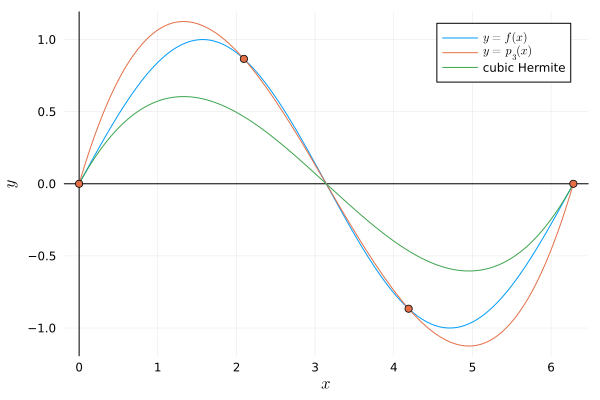

In [8]:
using Polynomials

a, b = 0.0, 2π

xx = range(a, b, 4)
yy = f.(xx)
p = fit(xx, yy)

h = cubic_hermite(f, f′, a, b)

plot(axes_style=:zerolines, xlabel=L"x", ylabel=L"y")
plot!(f, a, b, label=L"y = f(x)")
plot!(x -> p(x), a, b, label=L"y = p_3(x)")
plot!(h, a, b, label="cubic Hermite")
scatter!(xx, yy, label=:none, c=2)

---